<a href="https://colab.research.google.com/github/CoolfaceJerkCity/Grupo_N_UDEP_Python/blob/main/Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importaciones necesarias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Obteniendo el dataset

In [ ]:
df_strokes = pd.read_csv('https://raw.githubusercontent.com/CoolfaceJerkCity/Grupo_N_UDEP_Python/main/healthcare-dataset-stroke-data.csv')
df_strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Matriz de correlación de features

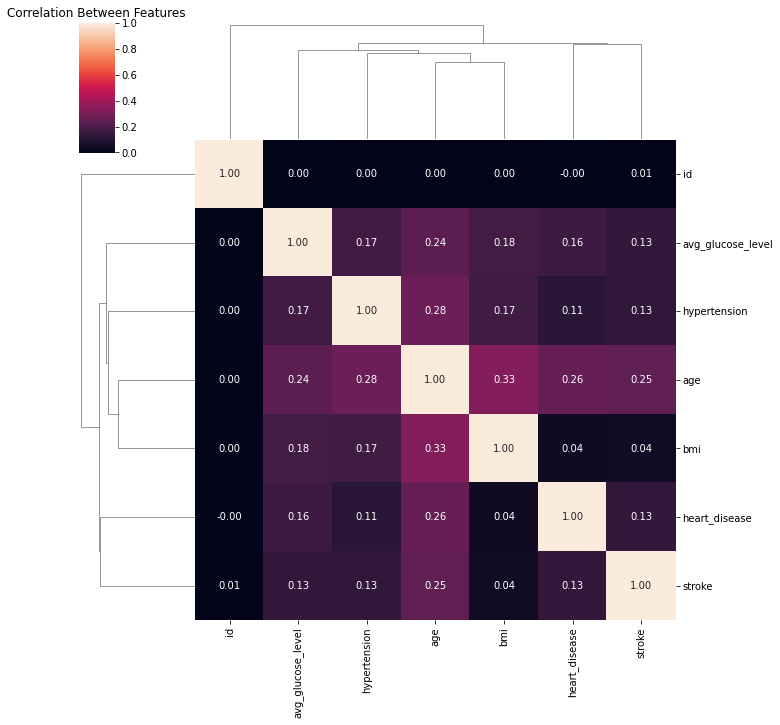

In [ ]:
corr_data = df_strokes.corr()
sns.clustermap(corr_data,annot= True,fmt = '.2f')

plt.title('Correlation Between Features')
plt.show();

##Describiendo el dataframe

In [ ]:
df_strokes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
df_strokes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df_strokes["stroke"].value_counts() 
#1 = Stroke, 0= No stroke

0    4861
1     249
Name: stroke, dtype: int64

##Eliminando missing values

In [ ]:
df_strokes = df_strokes.dropna() # Borrando datos nulos
df_strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


##HotEncoding / Labeling / Downgrading

In [ ]:
#Convirtiendo smoking status y gender a un valor binario
df_strokes['smoking_status'] = df_strokes['smoking_status'].replace({'formerly smoked' or 'smokes':'smoked','never smoked' or 'Unknown':'non_smoking'})
df_strokes['smoking_status'] = [1 if i.strip() == 'smoked' else 0 for i in df_strokes.smoking_status]
df_strokes['gender'] = [1 if i.strip() == 'Male' else 0 for i in df_strokes.gender]
df_strokes = df_strokes.drop(columns=['id', 'work_type'])
df_strokes.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Urban,228.69,36.6,1,1
2,1,80.0,0,1,Yes,Rural,105.92,32.5,0,1
3,0,49.0,0,0,Yes,Urban,171.23,34.4,0,1
4,0,79.0,1,0,Yes,Rural,174.12,24.0,0,1
5,1,81.0,0,0,Yes,Urban,186.21,29.0,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

def labelingData(df, columns):
  try:
    for column_name in columns:
      X_feat_data = df[column_name]#Recibiendo datos de la columna
      X_feat_data_array = np.array(X_feat_data)
      print(X_feat_data_array) #Se imprime los datos sin normalizar

      encoder = LabelEncoder()#Aplicando labeling
      encoder.fit(X_feat_data_array)
      X_encoder = encoder.fit_transform(X_feat_data_array)
      print("="*40)
      print(X_encoder)#Se imprime los datos ya normalizados

      df[column_name] = X_encoder
      print("="*40)
      print(f'La columna {column_name}_lbl fue agregada al dataframe correctamente')

    return df

  except:
    print("No se actualizo el dataframe debido a un error inesperado =(")

In [ ]:
df_strokes_normalized = labelingData(df_strokes, ['ever_married','Residence_type'])

['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
[1 1 1 ... 1 1 1]
La columna ever_married_lbl fue agregada al dataframe correctamente
['Urban' 'Rural' 'Urban' ... 'Rural' 'Rural' 'Urban']
[1 0 1 ... 0 0 1]
La columna Residence_type_lbl fue agregada al dataframe correctamente


In [ ]:
df_strokes_normalized.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
2,1,80.0,0,1,1,0,105.92,32.5,0,1
3,0,49.0,0,0,1,1,171.23,34.4,0,1
4,0,79.0,1,0,1,0,174.12,24.0,0,1
5,1,81.0,0,0,1,1,186.21,29.0,1,1


##Dividiendo la data

In [ ]:
X = np.array(df_strokes_normalized.drop(columns=['stroke'])) #Features
y = np.array(df_strokes_normalized["stroke"]) #Target

In [ ]:
#Imprimiendo la data y el shape del feature y target
print(X[0, :])
print(np.shape(X))
print("="*50)
print(y[0:])
print(np.shape(y))

[  1.    67.     0.     1.     1.     1.   228.69  36.6    1.  ]
(4909, 9)
[1 1 1 ... 0 0 0]
(4909,)


##Guardando en formato csv la data sin escalar ni estandarizar

In [ ]:
df_strokes_normalized.to_csv('df_strokes_lbl_encoded.csv', index=False)

##Estandarización de datos

In [ ]:
from sklearn.preprocessing import StandardScaler
#Estandarizando la data
scaler = StandardScaler().fit(X)
X_standarized = scaler.transform(X)

print(X[0, :])
print('='*50)
print(X_standarized[0, :])

[  1.    67.     0.     1.     1.     1.   228.69  36.6    1.  ]
[ 1.20044746  1.07013796 -0.31806673  4.38196829  0.72948428  0.98563987
  2.77769839  0.98134488  2.20567315]


##Escalamiento de datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler as MMS
scaler2 = MMS(feature_range = (0, 1))
X_scaled = scaler2.fit_transform(X_standarized)

print(X_standarized[0, :])
print('='*50)
print(X_scaled[0, :])

[ 1.20044746  1.07013796 -0.31806673  4.38196829  0.72948428  0.98563987
  2.77769839  0.98134488  2.20567315]
[1.         0.81689453 0.         1.         1.         1.
 0.80126489 0.30126002 1.        ]


In [ ]:
#Observando data escalada y estandarizada
new_df = pd.DataFrame(np.c_[X_scaled, y], columns=['gender','age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','smoking_status','stroke'])
new_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.816895,0.0,1.0,1.0,1.0,0.801265,0.301260,1.0,1.0
1,1.0,0.975586,0.0,1.0,1.0,0.0,0.234512,0.254296,0.0,1.0
2,0.0,0.597168,0.0,0.0,1.0,1.0,0.536008,0.276060,0.0,1.0
3,0.0,0.963379,1.0,0.0,1.0,0.0,0.549349,0.156930,0.0,1.0
4,1.0,0.987793,0.0,0.0,1.0,1.0,0.605161,0.214204,1.0,1.0


##Observando la matriz de correlacion estandarizada/escalada

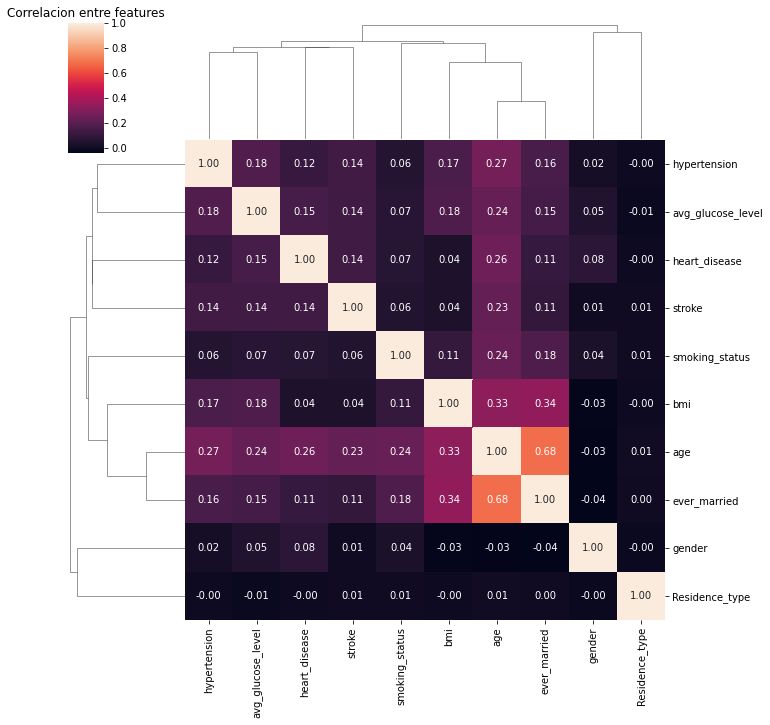

In [ ]:
corr_data = new_df.corr()
sns.clustermap(corr_data,annot= True,fmt = '.2f')

plt.title('Correlacion entre features')
plt.show();

##Exportando el dataframe estandarizado a un nuevo CSV

In [ ]:
new_df.to_csv('df_strokes_standarized.csv', index=False)